## **Installing libraries**

Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

In [ ]:
! pip install chembl_webresource_client

## **Importing libraries**

In [ ]:
# Import necessary libraries

from chembl_webresource_client.new_client import new_client

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.legend_handler import HandlerBase
import seaborn as sns
import missingno as msno
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

## **Search for Target protein**

### **Target search for coronavirus**

In [ ]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,14.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
5,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
6,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,5.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859


### **Select and retrieve bioactivity data for *SARS coronavirus 3C-like proteinase* (seventh entry)**

In [ ]:
print(targets.target_chembl_id[6])

CHEMBL5118


Here, we will retrieve only bioactivity data for *coronavirus 3C-like proteinase* (CHEMBL5118) that are reported as IC$_{50}$ values in nM (nanomolar) unit.

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=targets.target_chembl_id[6]).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)

In [ ]:
df.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1988091,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,Outside typical range,Values for this activity type are unusually la...,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,None,CHEMBL194398,None,CHEMBL194398,None,False,http://www.openphacts.org/units/Nanomolar,663132,=,1,True,=,None,IC50,nM,None,870000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,870.0
1,None,1988092,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,Outside typical range,Values for this activity type are unusually la...,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,None,CHEMBL393608,None,CHEMBL393608,None,False,http://www.openphacts.org/units/Nanomolar,663138,=,1,True,=,None,IC50,nM,None,200000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,200.0
2,None,1988093,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,Outside typical range,Values for this activity type are unusually la...,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,None,CHEMBL238216,None,CHEMBL238216,None,False,http://www.openphacts.org/units/Nanomolar,663137,=,1,True,=,None,IC50,nM,None,300000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,300.0
3,None,1988094,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,None,None,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,"{'bei': '7.31', 'le': '0.14', 'lle': '3.95', '...",CHEMBL235873,None,CHEMBL235873,4.82,False,http://www.openphacts.org/units/Nanomolar,663136,=,1,True,=,None,IC50,nM,None,15000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,15.0
4,None,1988095,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,None,None,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,"{'bei': '7.99', 'le': '0.16', 'lle': '4.33', '...",CHEMBL397154,None,CHEMBL397154,5.00,False,http://www.openphacts.org/units/Nanomolar,663135,=,1,True,=,None,IC50,nM,None,10000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,10.0


In [ ]:
df.standard_type.unique()

array(['IC50'], dtype=object)

## **Handling missing data**

In [ ]:
df2 = df[df.standard_value.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1988091,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,Outside typical range,Values for this activity type are unusually la...,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,None,CHEMBL194398,None,CHEMBL194398,None,False,http://www.openphacts.org/units/Nanomolar,663132,=,1,True,=,None,IC50,nM,None,870000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,870.0
1,None,1988092,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,Outside typical range,Values for this activity type are unusually la...,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,None,CHEMBL393608,None,CHEMBL393608,None,False,http://www.openphacts.org/units/Nanomolar,663138,=,1,True,=,None,IC50,nM,None,200000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,200.0
2,None,1988093,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,Outside typical range,Values for this activity type are unusually la...,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,None,CHEMBL238216,None,CHEMBL238216,None,False,http://www.openphacts.org/units/Nanomolar,663137,=,1,True,=,None,IC50,nM,None,300000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,300.0
3,None,1988094,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,None,None,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,"{'bei': '7.31', 'le': '0.14', 'lle': '3.95', '...",CHEMBL235873,None,CHEMBL235873,4.82,False,http://www.openphacts.org/units/Nanomolar,663136,=,1,True,=,None,IC50,nM,None,15000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,15.0
4,None,1988095,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,None,None,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,"{'bei': '7.99', 'le': '0.16', 'lle': '4.33', '...",CHEMBL397154,None,CHEMBL397154,5.00,False,http://www.openphacts.org/units/Nanomolar,663135,=,1,True,=,None,IC50,nM,None,10000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,None,18548176,[],CHEMBL4198706,Inhibition of SARS coronavirus 3CL protease us...,B,BAO_0000190,BAO_0000357,single protein format,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,None,None,CHEMBL4196085,Eur J Med Chem,2018,"{'bei': '8.30', 'le': '0.17', 'lle': '4.99', '...",CHEMBL4208764,None,CHEMBL4301230,5.37,False,http://www.openphacts.org/units/Nanomolar,3079451,=,1,True,=,None,IC50,nM,None,4300.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,4.3
211,None,18548177,[],CHEMBL4198706,Inhibition of SARS coronavirus 3CL protease us...,B,BAO_0000190,BAO_0000357,si

## **Data pre-processing of the bioactivity data**

### **Labeling compounds as either being active, inactive or intermediate**

In [ ]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

### ***molecule_chembl_id* to a list**

In [ ]:
mol_cid = []
for i in df2.molecule_chembl_id:
  mol_cid.append(i)

### ***canonical_smiles* to a list**

In [ ]:
canonical_smiles = []
for i in df2.canonical_smiles:
  canonical_smiles.append(i)

### ***standard_value* to a list**

In [ ]:
standard_value = []
for i in df2.standard_value:
  standard_value.append(i)

### **Combine the 4 lists into a dataframe**

In [ ]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df3 = pd.DataFrame( data_tuples,  columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])

In [ ]:
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,inactive,870000.0
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,200000.0
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,300000.0
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,15000.0
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,10000.0
...,...,...,...,...
209,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,intermediate,4300.0
210,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,intermediate,5500.0
211,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,intermediate,4100.0
212,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,intermediate,3200.0


## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-10-13 06:17:30--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’

Miniconda3-py37_4.8 100%[===================>]  81.12M   247MB/s    in 0.3s    

2020-10-13 06:17:30 (247 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-packa

In [ ]:
df = df3

## **Calculate Lipinski descriptors**

### **Import libraries**

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,580.682,2.68582,3.0,8.0
1,547.653,1.39862,4.0,8.0
2,581.670,1.59522,4.0,8.0
3,659.781,0.87060,6.0,9.0
4,625.764,0.67400,6.0,9.0
...,...,...,...,...
209,668.767,-2.95720,4.0,10.0
210,524.659,2.51690,3.0,7.0
211,628.721,-1.81440,4.0,10.0
212,468.551,0.95810,3.0,7.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,inactive,870000.0
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,200000.0
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,300000.0
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,15000.0
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,10000.0
...,...,...,...,...
209,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,intermediate,4300.0
210,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,intermediate,5500.0
211,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,intermediate,4100.0
212,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,intermediate,3200.0


Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,inactive,870000.0,580.682,2.68582,3.0,8.0
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,200000.0,547.653,1.39862,4.0,8.0
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,300000.0,581.670,1.59522,4.0,8.0
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,15000.0,659.781,0.87060,6.0,9.0
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,10000.0,625.764,0.67400,6.0,9.0
...,...,...,...,...,...,...,...,...
209,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,intermediate,4300.0,668.767,-2.95720,4.0,10.0
210,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,intermediate,5500.0,524.659,2.51690,3.0,7.0
211,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,intermediate,4100.0,628.721,-1.81440,4.0,10.0
212,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,intermediate,3200.0,468.551,0.95810,3.0,7.0


### **Convert IC50 to pIC50**
This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
          i = float(i)
          molar = i*(10**-9) # Converts nM to M
          pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [ ]:
df_combined.standard_value.describe()

count         214
unique        157
top       50000.0
freq           29
Name: standard_value, dtype: object

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        i = float(i)
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,inactive,580.682,2.68582,3.0,8.0,870000.0
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,547.653,1.39862,4.0,8.0,200000.0
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,581.670,1.59522,4.0,8.0,300000.0
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,659.781,0.87060,6.0,9.0,15000.0
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,625.764,0.67400,6.0,9.0,10000.0
...,...,...,...,...,...,...,...,...
209,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,intermediate,668.767,-2.95720,4.0,10.0,4300.0
210,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,intermediate,524.659,2.51690,3.0,7.0,5500.0
211,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,intermediate,628.721,-1.81440,4.0,10.0,4100.0
212,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,intermediate,468.551,0.95810,3.0,7.0,3200.0


In [ ]:
df_norm.standard_value_norm.describe()

count       214.000000
mean      55138.037383
std       96554.024824
min         160.000000
25%        8900.000000
50%       28500.000000
75%       50000.000000
max      870000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,inactive,580.682,2.68582,3.0,8.0,3.060481
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,547.653,1.39862,4.0,8.0,3.698970
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,581.670,1.59522,4.0,8.0,3.522879
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,659.781,0.87060,6.0,9.0,4.823909
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,625.764,0.67400,6.0,9.0,5.000000
...,...,...,...,...,...,...,...,...
209,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,intermediate,668.767,-2.95720,4.0,10.0,5.366532
210,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,intermediate,524.659,2.51690,3.0,7.0,5.259637
211,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,intermediate,628.721,-1.81440,4.0,10.0,5.387216
212,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,intermediate,468.551,0.95810,3.0,7.0,5.494850


In [ ]:
df_final.pIC50.describe()

count    214.000000
mean       4.635885
std        0.619425
min        3.060481
25%        4.301030
50%        4.545166
75%        5.050691
max        6.795880
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,inactive,580.682,2.68582,3.0,8.0,3.060481
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,547.653,1.39862,4.0,8.0,3.698970
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,581.670,1.59522,4.0,8.0,3.522879
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,659.781,0.87060,6.0,9.0,4.823909
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,625.764,0.67400,6.0,9.0,5.000000
...,...,...,...,...,...,...,...,...
198,CHEMBL3818400,CC(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](CO)C(=O)N[C...,inactive,604.614,-4.32570,10.0,10.0,5.000000
199,CHEMBL3818761,CC(=O)N[C@@H](Cc1cnc[nH]1)C(=O)N[C@@H](CO)C(=O...,inactive,626.668,-3.83460,10.0,10.0,4.301030
201,CHEMBL3818028,CC(=O)N[C@@H](CC(N)=O)C(=O)N[C@@H](CO)C(=O)N[C...,inactive,605.558,-6.49640,11.0,11.0,4.698970
204,CHEMBL4209146,CC(C)C[C@H](NC(=O)OC1CCN(S(C)(=O)=O)CC1)C(=O)N...,inactive,474.580,-0.23880,3.0,7.0,4.540608


---

## **Exploratory Data Analysis**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

Text(0, 0.5, 'Frequency')

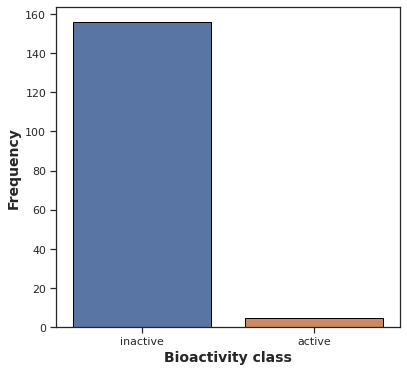

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

### **Scatter plot of MW versus LogP**

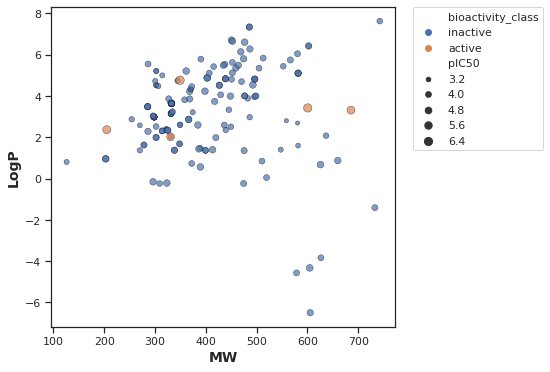

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

#### **pIC50 value**

Text(0, 0.5, 'pIC50 value')

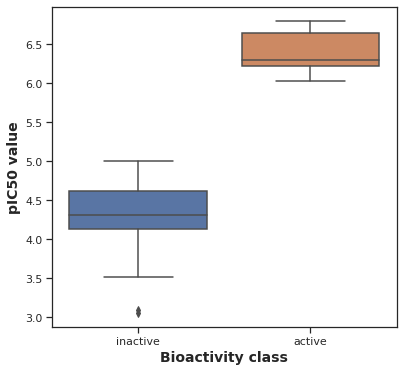

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.00007,0.05,Different distribution (reject H0)


#### **MW**

Text(0, 0.5, 'MW')

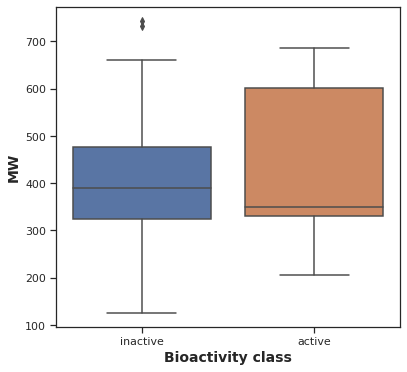

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,372.5,0.434204,0.05,Same distribution (fail to reject H0)


#### **LogP**

Text(0, 0.5, 'LogP')

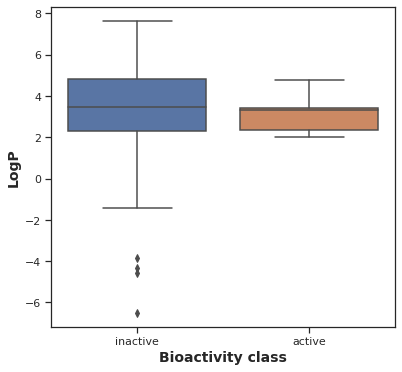

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,344.5,0.330487,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

Text(0, 0.5, 'NumHDonors')

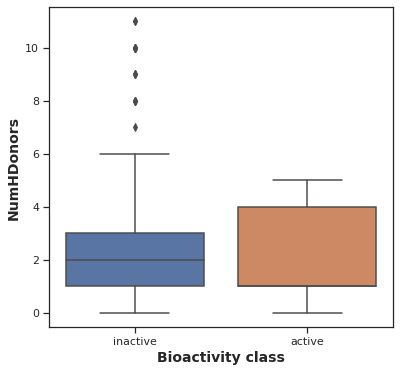

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,344.0,0.325201,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

Text(0, 0.5, 'NumHAcceptors')

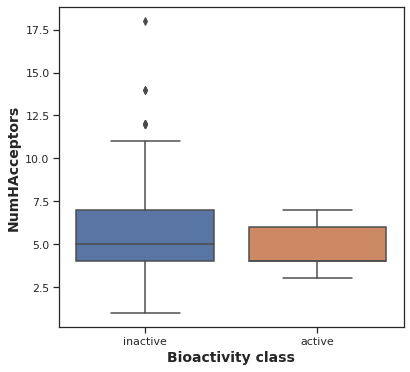

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,331.0,0.281512,0.05,Same distribution (fail to reject H0)


## **Download PaDEL-Descriptor**

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2020-10-13 06:17:58--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2020-10-13 06:17:59--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.2’

padel.zip.2         100%[===================>]  24.57M   103MB/s    in 0.2s    

2020-10-13 06:17:59 (103 MB/s) - ‘padel.zip.2’ saved [25768637/25768637]

--2020-10-13 06:17:59--  https://github.

In [ ]:
! unzip padel.zip

Archive:  padel.zip
replace __MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/._PaDEL-Descriptor  
replace PaDEL-Descriptor/MACCSFingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace PaDEL-Descriptor/MACCSFingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace PaDEL-Descriptor/MACCSFingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace PaDEL-Descriptor/MACCSFingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: All
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerpr

In [ ]:
df3 = df_2class

In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H](CC(=O)[C@@H](NC(=O)c1cc(C)on1)C(C)C)Cc1ccccc1	CHEMBL194398
CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](NC(=O)c1cc(C)on1)C(C)C	CHEMBL393608
CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@@H](NC(=O)c1cc(C)on1)C(C)C	CHEMBL238216
CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@@H](NC(=O)[C@H](CO)NC(=O)OC(C)(C)C)C(C)C	CHEMBL235873
CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](NC(=O)[C@H](CO)NC(=O)OC(C)(C)C)C(C)C	CHEMBL397154


In [ ]:
! cat molecule.smi | wc -l

161


## **Calculate fingerprint descriptors**


### **Calculate PaDEL descriptors**

In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing CHEMBL194398 in molecule.smi (1/161). 
Processing CHEMBL393608 in molecule.smi (2/161). 
Processing CHEMBL238216 in molecule.smi (3/161). Average speed: 1.98 s/mol.
Processing CHEMBL235873 in molecule.smi (4/161). Average speed: 1.10 s/mol.
Processing CHEMBL397154 in molecule.smi (5/161). Average speed: 1.04 s/mol.
Processing CHEMBL238217 in molecule.smi (6/161). Average speed: 0.87 s/mol.
Processing CHEMBL196635 in molecule.smi (7/161). Average speed: 0.79 s/mol.
Processing CHEMBL522710 in molecule.smi (8/161). Average speed: 0.74 s/mol.
Processing CHEMBL492771 in molecule.smi (10/161). Average speed: 0.72 s/mol.
Processing CHEMBL492771 in molecule.smi (9/161). Average speed: 0.70 s/mol.
Processing CHEMBL492772 in molecule.smi (11/161). Average speed: 0.60 s/mol.
Processing CHEMBL492768 in molecule.smi (12/161). Average speed: 0.55 s/mol.
Processing CHEMBL492768 in molecule.smi (13/161). Average speed: 0.54 s/mol.
Processing CHEMBL492769 in molecule.smi (14/161). Average sp

## **Preparing the X and Y Data Matrices**

### **X data matrix**

In [ ]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
157,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
158,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
159,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **Y variable**

### **Convert IC50 to pIC50**

In [ ]:
df3_Y = list(df3['pIC50'])

## **Combining X and Y variable**

In [ ]:
df3_X['pIC50'] = df3_Y
dataset3 = df3_X

# **Model Building**

## **1. Import libraries**

In [ ]:
#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [ ]:
df = dataset3

## **3. Input features**

### **3.1. Input features**

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
157,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
158,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
159,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [ ]:
Y = df.pIC50
Y

0      3.060481
1      3.698970
2      3.522879
3      4.823909
4      5.000000
         ...   
156    5.000000
157    4.301030
158    4.698970
159    4.540608
160    4.375718
Name: pIC50, Length: 161, dtype: float64

### **3.3. Data dimension**

In [ ]:
X.shape

(161, 881)

In [ ]:
Y.shape

(161,)

### **3.4. Remove low variance features**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(161, 167)

## **4. Data split (80/20 ratio)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, y_train.shape

((128, 167), (128,))

In [ ]:
X_test.shape, y_test.shape

((33, 167), (33,))

<a id="1"></a> <br>
# **Gradient Boosting Regression**

In [ ]:
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

MAE: 0.2921631518593673
MSE: 0.15533380658934887
RMSE: 0.39412410049291435


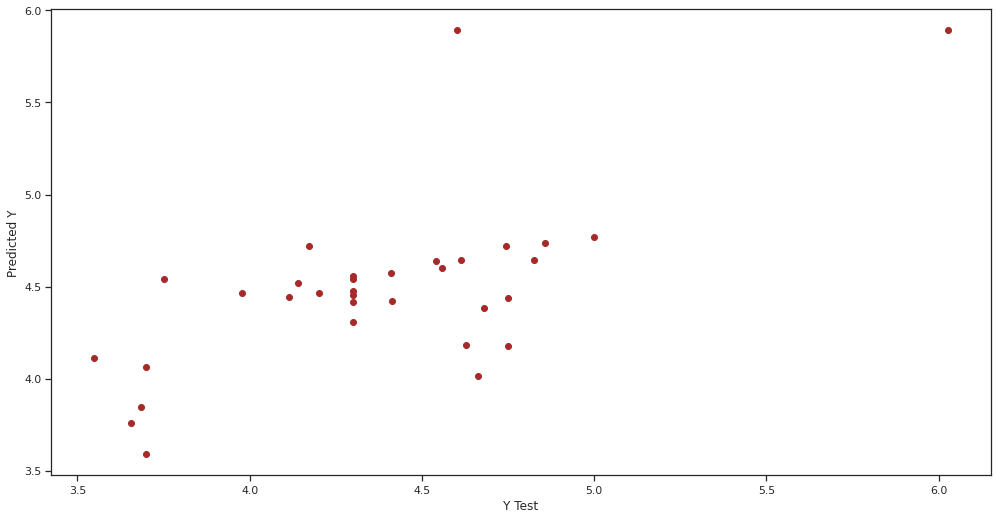

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,clf_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

<a id="1"></a> <br>
# **Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')

In [ ]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

MAE: 0.3943060812758865
MSE: 0.32685097200234553
RMSE: 0.5717088174957121


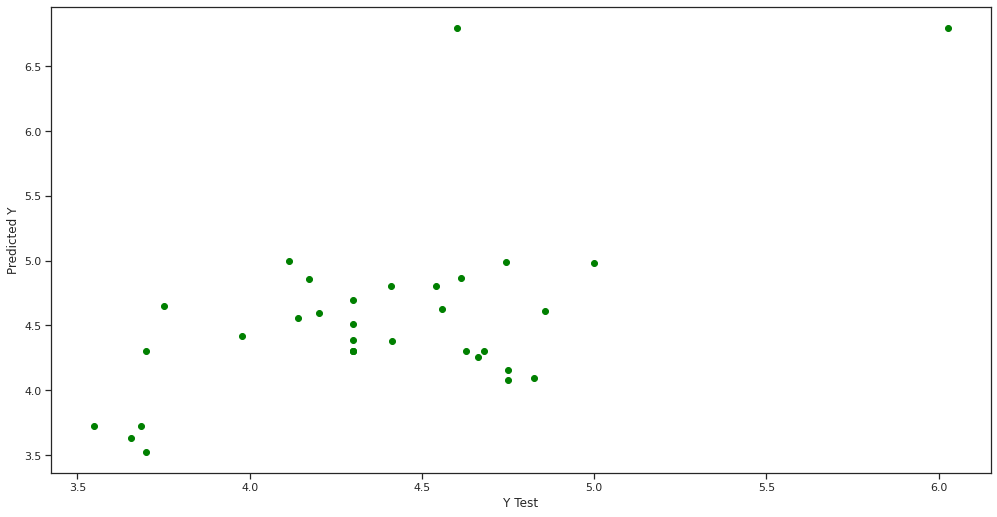

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

<a id="1"></a> <br>
# **Support Vector Machine Regression**

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

MAE: 0.2963077475258582
MSE: 0.1518306599282603
RMSE: 0.38965453921167187


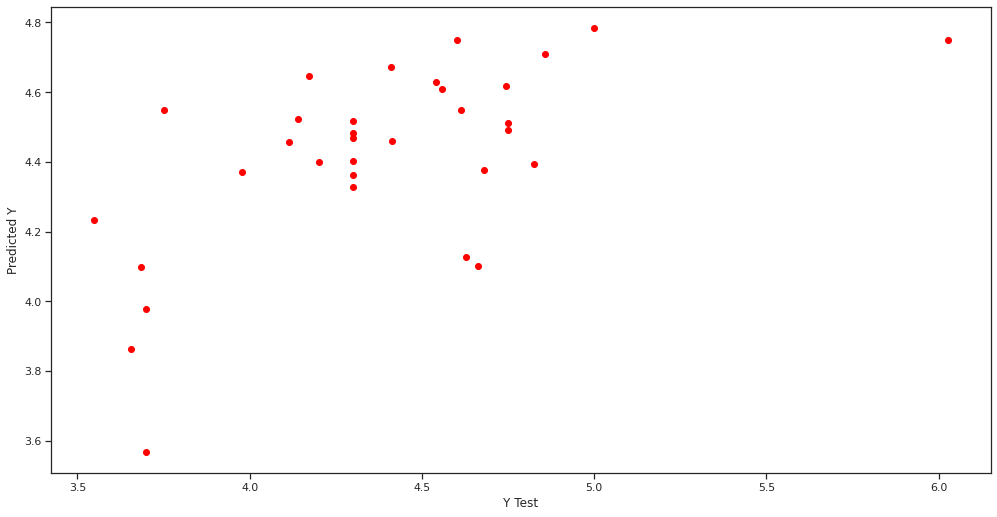

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

<a id="1"></a> <br>
# **Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 0.302772897988821
MSE: 0.1416303415627379
RMSE: 0.37633806818170534


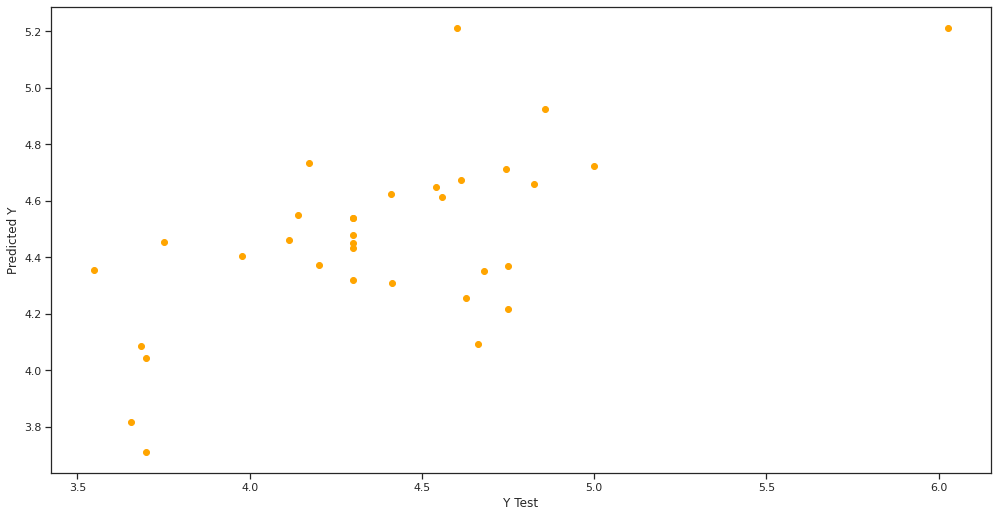

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# **LightGBM**

In [ ]:
import lightgbm as lgb

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.1, n_estimators=500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
model_lgb.fit(X_train,y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2319, feature_fraction_seed=9,
              importance_type='split', learning_rate=0.1, max_bin=55,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=6, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=500, n_jobs=-1,
              num_leaves=5, objective='regression', random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lgb_pred = model_lgb.predict(X_test)
lgb_pred = lgb_pred.reshape(-1,1)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, lgb_pred))
print('MSE:', metrics.mean_squared_error(y_test, lgb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lgb_pred)))

MAE: 0.3220785053014846
MSE: 0.16119051325882097
RMSE: 0.40148538361791075


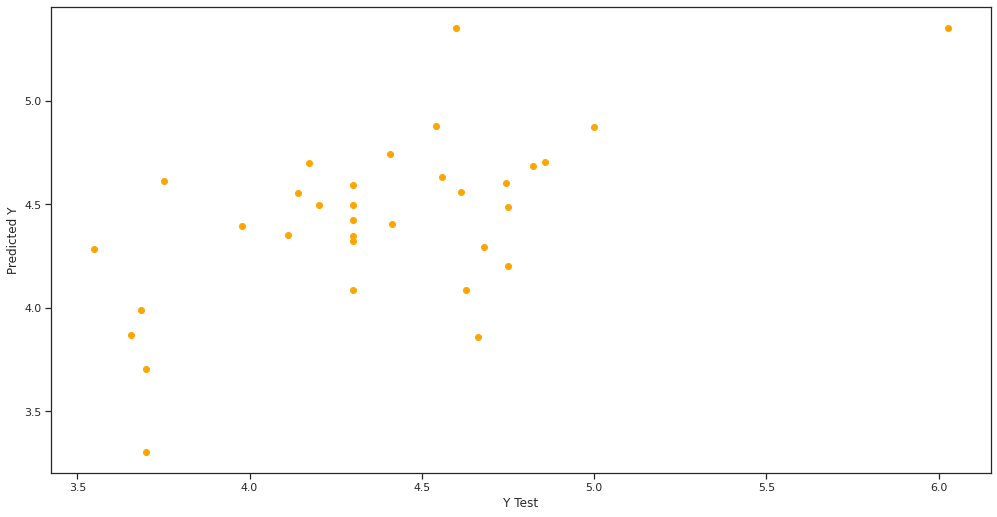

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,lgb_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# **Model Comparison**

**We can say the best working model by looking at the MSE rates The best working model is RANDOM FOREST.**
We are going to see the error rate. Which one is better?


In [ ]:
error_rate=np.array([metrics.mean_squared_error(y_test, clf_pred),metrics.mean_squared_error(y_test, dtr_pred),metrics.mean_squared_error(y_test, svr_pred),metrics.mean_squared_error(y_test, rfr_pred)])

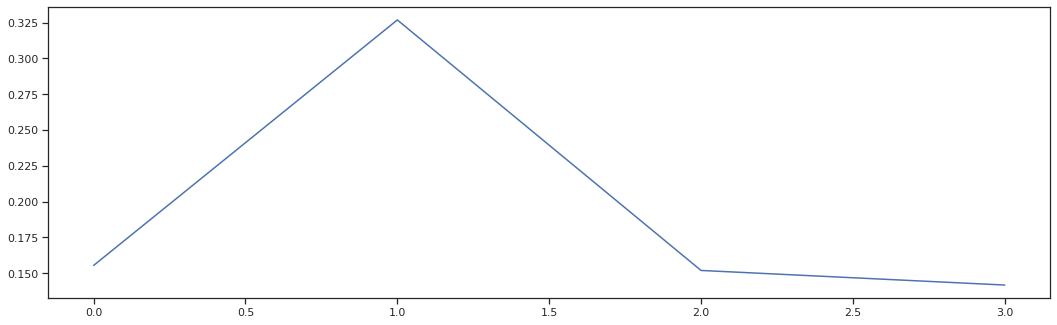

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(error_rate)